# Lab 3.1

Goals:
 
* Use `sympy` for symbolic algebra computations.
* Convert symbolic expressions to fuctions so they can be graphed.
* Write a function to produce Taylor Polynomials



Import the following libraries.


In [1]:
import numpy as np
import sympy
import matplotlib.pyplot as plt

Run this code cell to define the following `sympy` expressions.  It also defines `x` to be a `sympy` symbol.

In [12]:
#define a symbolic variable x.  
x=sympy.Symbol('x')

expr1 = sympy.cos(x**3-2*x) #Carol
expr2 = sympy.sin(x**3+2*x) #Asuka
expr3 = sympy.sin(2*x**2)+sympy.cos(x)
expr4 = (x**3-x)*sympy.cos(x)
expr5 = x*sympy.sin(x**3+x) # Saanvi

Pick a different expression than each of your groupmates.  For the rest of this lab, it is referred to as *your function*.

## Q1

Copy/paste your `taylorpolynomial()` function from the prelab.  Then use it to print the degree 10 Taylor polynomial of your function, centered at 0.

In [22]:
def taylorpoly(f,a,n):
  x=sympy.Symbol('x')
  poly=0
  for i in range(n+1):
    der=sympy.diff(f,x,i)
    derval=der.subs(x,a)
    u=sympy.Symbol('u')
    fact=sympy.factorial(u)
    term=(derval/fact.subs(u,i))*(x-a)**i
    poly=poly+term
  return poly
taylorpoly(expr1,0,10)

-1402*x**10/2025 + 401*x**8/315 - 173*x**6/90 + 8*x**4/3 - 2*x**2 + 1

## Q2

Using `sympy.lambdify()`, convert your function and its Taylor polynomial to functions that can be applied to `numpy` arrays.  Then plot both of them together on an axis.

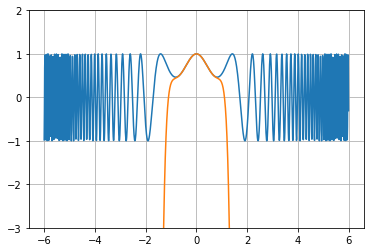

In [4]:
x = sympy.Symbol('x')

f=sympy.lambdify(x, expr1, 'numpy')
expr1tay=taylorpoly(expr1,0,10)
df1=sympy.lambdify(x, expr1tay, 'numpy')
x=np.arange(-6,6,0.01)
y=f(x)
y2=df1(x)

ax=plt.axes()
ax.plot(x,y) # blue
ax.plot(x,y2) # orange
ax.grid()
plt.ylim((-3,2))
plt.show()

## Q3

Recall that 
* An *even* function is symmetric across the $y$-axis. It satisfies $f(x)=f(-x)$ for all $x$.
* An *odd* function is symmetric across the origin.  It satisfies $f(x)=-f(-x)$ for all $x$.

Some of your group members have even functions and some have odd functions. In a text cell explain how this is reflected in their Taylor polyomials centered at 0. You should specifically reference evidence from their functions.  Give a mathematical explanation for why this pattern should generalize to any even or odd function.

Even functions have non-zero coefficients with even powers of x in their Taylor polynomials. For example, expr1, expr3, and expr5 are even and have x^10, x^8, x^6, x^4, and x^2. Odd functions have non-zero coefficients with odd powers of x in their Taylor polynomials. For example, expr2 and expr4 are odd and have x^9, x^7, x^5, and x^3.

If a function is even, taking the first derivative will give f'(x), which equals to -f(-x). Thus, f'(x) is odd, and the 10th derivative of f(x) is even. On the other hand, the derivative of an odd function is even because f'(x) = f'(-x). Thus, the 10th derivative of f(x) is odd.

In [24]:
print(expr1)
taylorpoly(expr1,0,10)

cos(x**3 - 2*x)


-1402*x**10/2025 + 401*x**8/315 - 173*x**6/90 + 8*x**4/3 - 2*x**2 + 1

In [8]:
print(expr2)
taylorpoly(expr2,0,10)

sin(x**3 + 2*x)


2339*x**9/5670 - 113*x**7/315 - 26*x**5/15 - x**3/3 + 2*x

sin(2*x**2) + cos(x)
967679*x**10/3628800 + x**8/40320 - 961*x**6/720 + x**4/24 + 3*x**2/2 + 1


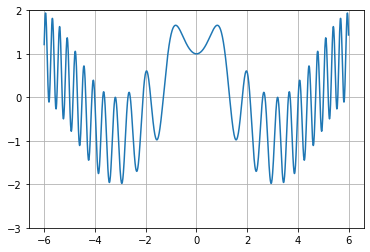

In [18]:
print(expr3)
print(taylorpoly(expr3,0,10))

x = sympy.Symbol('x')
f=sympy.lambdify(x, expr3, 'numpy')
x=np.arange(-6,6,0.01)
y=f(x)
ax=plt.axes()
ax.plot(x,y)
ax.grid()
plt.ylim((-3,2))
plt.show()

(x**3 - x)*cos(x)
-19*x**9/13440 + 31*x**7/720 - 13*x**5/24 + 3*x**3/2 - x


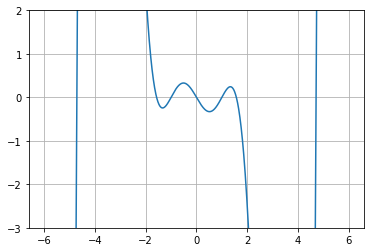

In [19]:
print(expr4)
print(taylorpoly(expr4,0,10))

x = sympy.Symbol('x')
f=sympy.lambdify(x, expr4, 'numpy')
x=np.arange(-6,6,0.01)
y=f(x)
ax=plt.axes()
ax.plot(x,y)
ax.grid()
plt.ylim((-3,2))
plt.show()

In [13]:
print(expr5)
taylorpoly(expr5,0,10)

x*sin(x**3 + x)


-30743*x**10/362880 - 2311*x**8/5040 - 59*x**6/120 + 5*x**4/6 + x**2